# File Description

# File Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

sys.path.append('C:\\Users\\Administrator\\GNS Science\\Pacific Island Sea Level Team - Documents\\General\\Model_and_data\\python_classes')

from BNVisualisation import BNVisualisation
from BNValidation import BNValidation
from BNModelSetup import BNModelSetup

from SM1_preprocessing import *
# from create_SM1 import create_SM1

# Create SM1

In [106]:
# Import and preprocess data
df_Pto_lagoon,SM1_variables_dict = SM1_preprocessing_lagoon()

In [107]:
# Create a dictionary of arcs to set
arcs_list = [
    {'WindDir':'H0'},
    {'Wind':'H0'},
    {'WindDir':'H0L0'},
    {'Wind':'H0L0'}
]

In [532]:
# Create a dictionary to put the discretisations into
var_dict = {
    'Wind':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High'],
        'evidence':[0.1,0.1,0.9],
        'data':SM1_variables_dict['Wind']
    },
    'WindDir':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High'],
        'evidence':[0.74,0.01,0.25],
        'data':SM1_variables_dict['WindDir']
    },
    'H0':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High'],
        'data':SM1_variables_dict['H0']
    },
    'H0L0':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High'],
        'data':SM1_variables_dict['H0L0']
    }
}

In [534]:
# Discretise the data

df_SM1_input_disc,var_dict = BNModelSetup().discretiser(SM1_variables_dict,var_dict)

# Create the BN
ds_SM1_input,net_SM1,SM1_node_ids = BNModelSetup().create_SM(arcs_list)

# Get conditional probs tables
BNModelSetup().get_conditional_prob_table(net_SM1,'H0')


WindDir      High                           Low                           Mid  \
Wind         High       Low       Mid      High       Low       Mid      High   
H0                                                                              
High     0.215427  0.055558  0.073463  0.801285  0.121446  0.399381  0.205335   
Low      0.144946  0.676065  0.497836  0.010177  0.541742  0.197200  0.171568   
Mid      0.639627  0.268377  0.428701  0.188538  0.336812  0.403419  0.623097   

WindDir                      
Wind          Low       Mid  
H0                           
High     0.051010  0.061390  
Low      0.666951  0.529133  
Mid      0.282039  0.409477

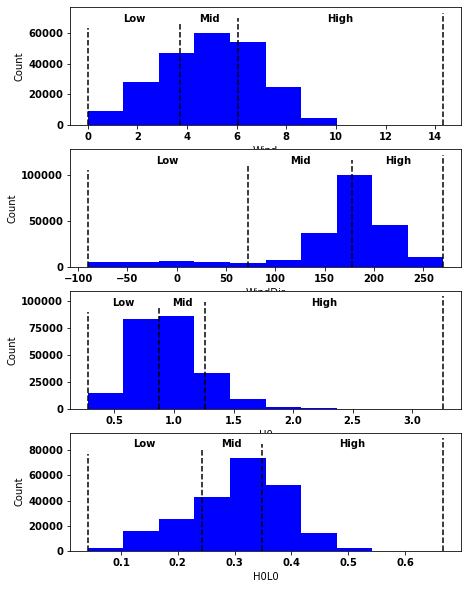

In [539]:
BNModelSetup().plot_discretiser(var_dict)

In [540]:
# Set evidence and get beliefs
net_SM1,var_dict = BNModelSetup().set_evidence(net_SM1,var_dict)

{'Wind': {'n_bins': 3,
  'strategy': 'kmeans',
  'bin_names': ['Low', 'Mid', 'High'],
  'evidence': [0.1, 0.1, 0.9],
  'data': array([4.31408198, 4.33455398, 4.19860314, ..., 9.24675265, 8.33042196,
         8.31924737]),
  'bin_edges': array([5.71064130e-03, 3.72193968e+00, 6.06555144e+00, 1.43183119e+01]),
  'resulting_probs': {'Low': 0.06990737753834739,
   'Mid': 0.0635564686527202,
   'High': 0.8665361538089323}},
 'WindDir': {'n_bins': 3,
  'strategy': 'kmeans',
  'bin_names': ['Low', 'Mid', 'High'],
  'evidence': [0.74, 0.01, 0.25],
  'data': array([-63.31858054, -63.12438388, -61.87272475, ..., 223.97324201,
         220.98769058, 224.2813351 ]),
  'bin_edges': array([-89.9878431 ,  71.80934938, 178.17811153, 269.99642001]),
  'resulting_probs': {'Low': 0.790256893720469,
   'Mid': 0.0022740815133314497,
   'High': 0.2074690247661996}},
 'H0': {'n_bins': 3,
  'strategy': 'kmeans',
  'bin_names': ['Low', 'Mid', 'High'],
  'data': array([2.01365948, 1.98831832, 1.977404  , ..., 2

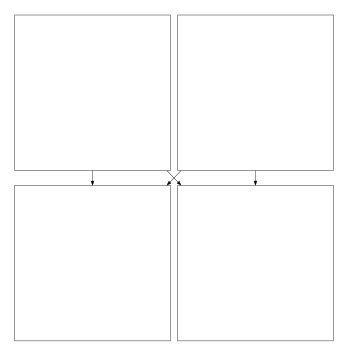

In [542]:
# Plot the BN  
graph_SM1 = BNVisualisation(ds_SM1_input,df_SM1_input_disc,net_SM1,var_dict).graph

graph_SM1


{'High': 0.11826849606325371, 'Low': 0.8798098152579098, 'Mid': 0.43738548554130485}


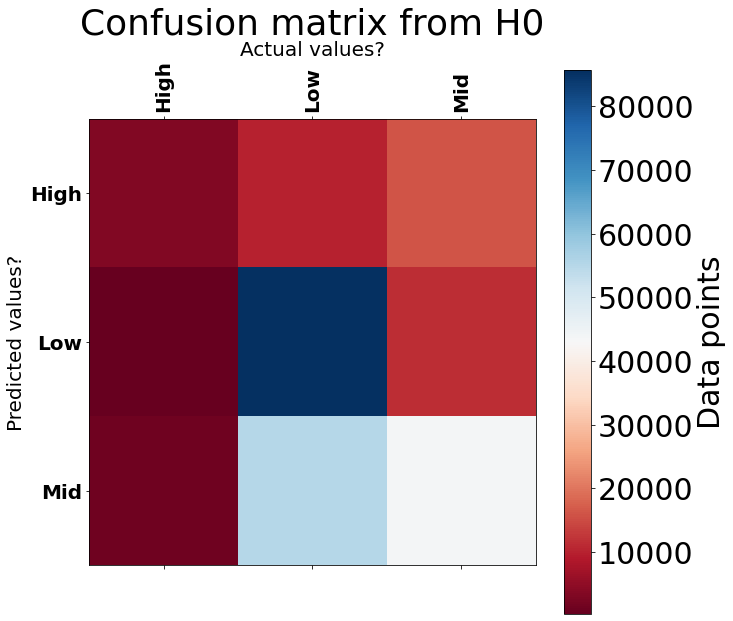

In [549]:
# Check out how good the model is

print(BNValidation(ds_SM1_input,net_SM1,"H0").acc_dict)

fig, ax = BNValidation(ds_SM1_input,net_SM1,"H0").confusion_matrix()


{'High': 0.6482935175872834, 'Low': 0.8565992673103001, 'Mid': 0.6139930937058546}


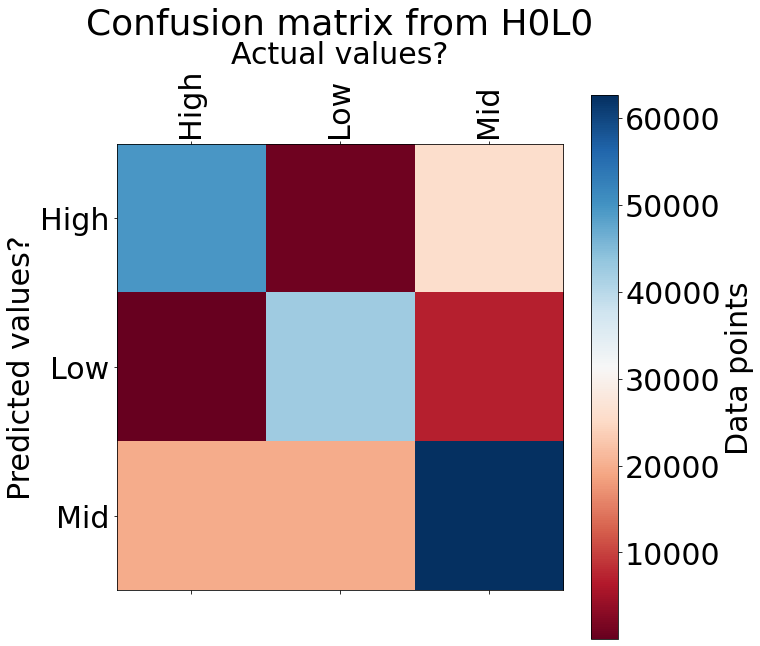

In [550]:
# Check out how good the model is

print(BNValidation(ds_SM1_input,net_SM1,"H0L0").acc_dict)

fig, ax = BNValidation(ds_SM1_input,net_SM1,"H0L0").confusion_matrix()


# Plotting Discretisation

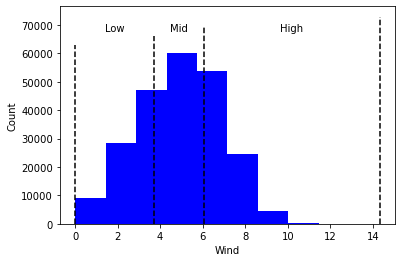

In [241]:

ax = plt.subplot2grid((1,1),(0,0))

ax.hist(df_Pto_lagoon['Wind'],color='b')

for edge in var_dict['Wind']['bin_edges']:
    ax.plot([edge,edge],ax.get_ylim(),c='k',ls='--')

for edge1,edge2,bin_name in \
        zip(var_dict['Wind']['bin_edges'][:-1],var_dict['Wind']['bin_edges'][1:],var_dict['Wind']['bin_names']):
    ax.text(np.mean([edge1,edge2]),ax.get_ylim()[1]*0.9,bin_name,ha='center', va='center') 
    
ax.set_xlabel('Wind')
ax.set_ylabel('Count')

plt.show()

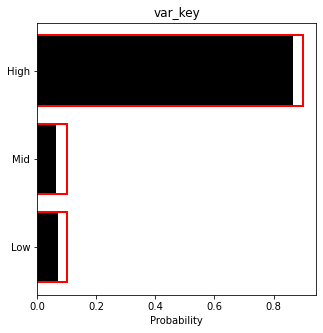

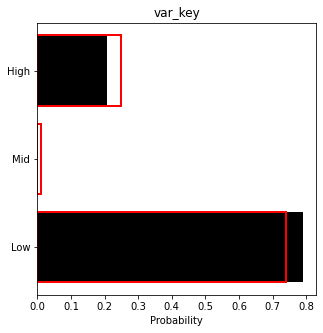

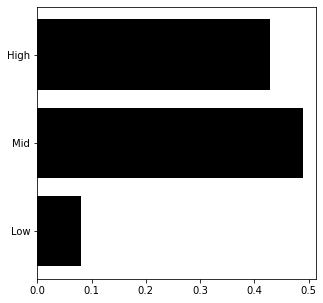

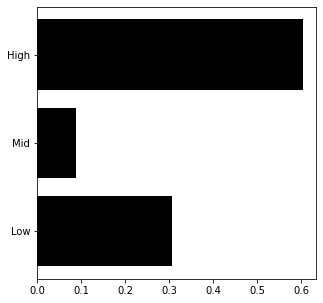

In [396]:
fig_dict = {}

for var_key in var_dict.keys():

    df_H0_probs = pd.DataFrame.from_dict(H0_prob_dict[var_key],orient='index',columns=['prob'])

    # Setup the figure
    fig, ax = plt.subplots(figsize=(5,5))

    ax.barh(y=np.arange(0,len(df_H0_probs),1),
            width=np.array(df_H0_probs.prob),
            tick_label=df_H0_probs.index,
            facecolor='k',
            edgecolor=None)
    # Try to plot the evidence (if there has been any set)
    try:
        ax.barh(y=np.arange(0,len(var_dict[var_key]['evidence']),1),
                width=np.array(var_dict[var_key]['evidence']),
                tick_label=var_dict[var_key]['bin_names'],
                fill=False,
                edgecolor ='r',
                linewidth=2)
    except:
        continue
        
    ax.set_xlabel('Probability')
    ax.set_title('var_key')

    plt.savefig('{}_graph.png'.format(var_key))
    
    # Add details of bin to the var dict
    var_dict.update({
        var_key:{**var_dict[var_key],**{'figure':'{}_graph.png'.format(var_key)}}
    })

,prob
Low,0.306264
Mid,0.089002
High,0.604735


In [404]:
df_H0_probs

,prob
Low,0.306264
Mid,0.089002
High,0.604735


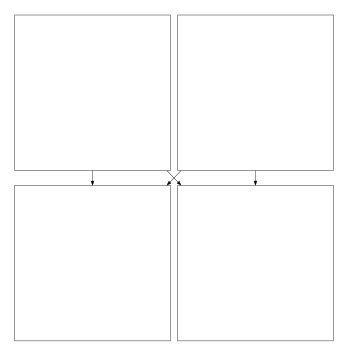

In [517]:
# Plot the BN  
graph_SM1 = BNVisualisation(ds_SM1_input,df_SM1_input_disc,net_SM1,var_dict).graph

graph_SM1


In [482]:
BNVisualisation(ds_SM1_input,df_SM1_input_disc,net_SM1,var_dict).var_dict

{'Wind': {'n_bins': 3,
  'strategy': 'kmeans',
  'bin_names': ['Low', 'Mid', 'High'],
  'evidence': [0.1, 0.1, 0.9],
  'bin_edges': array([5.71064130e-03, 3.72193968e+00, 6.06555144e+00, 1.43183119e+01]),
  'resulting_probs': {'Low': 0.06990737753834739,
   'Mid': 0.0635564686527202,
   'High': 0.8665361538089323},
  'figure': 'Wind_graph.png'},
 'WindDir': {'n_bins': 3,
  'strategy': 'kmeans',
  'bin_names': ['Low', 'Mid', 'High'],
  'evidence': [0.74, 0.01, 0.25],
  'bin_edges': array([-89.9878431 ,  71.80934938, 178.17811153, 269.99642001]),
  'resulting_probs': {'Low': 0.790256893720469,
   'Mid': 0.0022740815133314497,
   'High': 0.2074690247661996},
  'figure': 'WindDir_graph.png'},
 'H0': {'n_bins': 3,
  'strategy': 'kmeans',
  'bin_names': ['Low', 'Mid', 'High'],
  'bin_edges': array([0.27818465, 0.87384297, 1.26080742, 3.25895715]),
  'resulting_probs': {'Low': 0.08061775993002773,
   'Mid': 0.4897530700376603,
   'High': 0.429629170032312},
  'figure': 'H0_graph.png'},
 'H0L0

Wind
WindDir
H0
H0L0


In [162]:
print(net_SM1.get_node_value(2))

[0.06669149097761372, 0.6468822421208282, 0.28642626690155815]


# Discretisation

In [44]:
df_SM1_input_disc = BNModelSetup().discretiser(SM1_variables_dict,descretisation_dict)



In [45]:
SM1_variables_dict

{'Wind': array([4.31408198, 4.33455398, 4.19860314, ..., 9.24675265, 8.33042196,
        8.31924737]),
 'WindDir': array([-63.31858054, -63.12438388, -61.87272475, ..., 223.97324201,
        220.98769058, 224.2813351 ]),
 'H0': array([2.01365948, 1.98831832, 1.977404  , ..., 2.05956054, 2.11108518,
        2.14895964]),
 'H0L0': array([0.24854257, 0.24512598, 0.24308636, ..., 0.41728593, 0.41594124,
        0.41480645])}

In [101]:
discretisation_dict = {
    'Wind':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High']
    },
    'WindDir':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High']
    },
    'H0':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High']
    },
    'H0L0':{
        'n_bins':3,
        'strategy':'kmeans',
        'bin_names':['Low','Mid','High']
    }
}

In [131]:
from sklearn.preprocessing import KBinsDiscretizer

# Create an empty dictionary to put the discretised variables arrays into
discretised_arrays_dict = {}

for var_key,disc_params in discretisation_dict.items():
    
    # get the variable array
    var_array = SM1_variables_dict[var_key].reshape(-1, 1)
    
    # Discretise the data using kmeans clustering
    # Set up discretising function
    est = KBinsDiscretizer(n_bins=disc_params['n_bins'], encode='ordinal', strategy=disc_params['strategy'])

    # Use the discretiser on the array and gen output
    est.fit(var_array)
    discretised_array = est.transform(var_array)
    
    # Reshape to be x,
    discretised_array = discretised_array.reshape(len(discretised_array),)
    
    # Add discretised data to a dict
    discretised_arrays_dict.update({
        var_key:discretised_array
    })
    
# Make a dictionary of arrays that do not need to be discretised
other_arrays = {}
[other_arrays.update({x:SM1_variables_dict[x]}) for x in SM1_variables_dict.keys() if x not in discretisation_dict.keys()]

# Create a dataframe
df_discretised = pd.DataFrame.from_dict({**discretised_arrays_dict, **other_arrays})

# Save back as csv
df_discretised.to_csv('input_disc.csv',index=False)

return(df_discretised)

SyntaxError: 'return' outside function (<ipython-input-131-1d85700ee153>, line 37)

In [132]:
discretised_array = (discretised_array.astype(int)).astype(str)

for bin_no,bin_name in zip(np.arange(0,disc_params['n_bins'],1),disc_params['bin_names']):
    
    discretised_array[discretised_array==str(int(bin_no))] = bin_name


In [133]:
discretised_array

array(['Mid', 'Mid', 'Mid', ..., 'High', 'High', 'High'], dtype='<U11')

In [125]:
bin_no
{**discretised_arrays_dict, **other_arrays}

{'Wind': array([1., 1., 1., ..., 2., 2., 2.]),
 'WindDir': array([0., 0., 0., ..., 2., 2., 2.]),
 'H0': array([2., 2., 2., ..., 2., 2., 2.]),
 'H0L0': array([1., 1., 1., ..., 2., 2., 2.])}

,Wind,WindDir,H0,H0L0
0,1.0,0.0,2.0,1.0
1,1.0,0.0,2.0,1.0
2,1.0,0.0,2.0,1.0
3,1.0,0.0,2.0,0.0
4,1.0,0.0,2.0,0.0
...,...,...,...,...
227899,2.0,2.0,2.0,2.0
227900,2.0,2.0,2.0,2.0
227901,2.0,2.0,2.0,2.0
227902,2.0,2.0,2.0,2.0


In [91]:
other_arrays['H0L0'].shape

(227904,)

227904